In [47]:
#Import the necessary data science libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

In [48]:
df=pd.read_csv("NSE-TATA.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


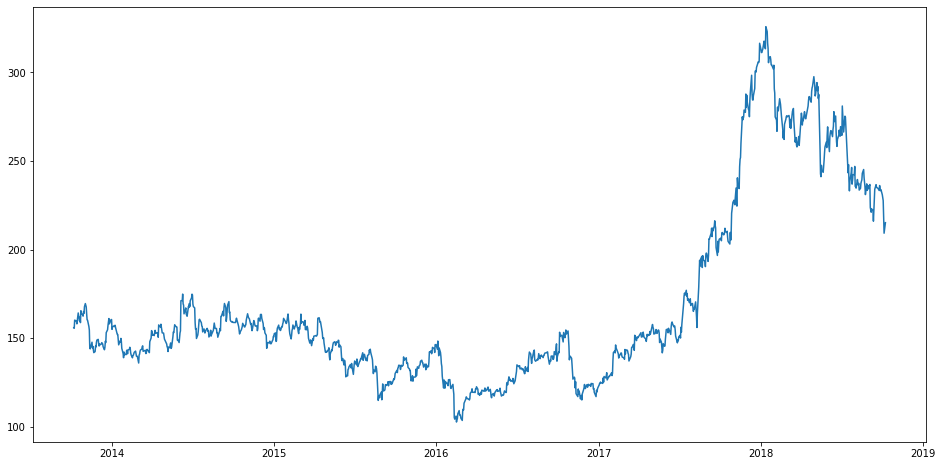

In [49]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']

plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

In [50]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])

for i in range(0,len(data)):
    new_dataset["Date"][i]=data["Date"][i]
    new_dataset["Close"][i]=data["Close"][i]

In [51]:
scaler = MinMaxScaler(feature_range=(0, 1))
new_dataset.index = new_dataset.Date
new_dataset.drop("Date", axis=1, inplace=True)
final_dataset = new_dataset.values

train_data = final_dataset[0:987, :]
valid_data = final_dataset[987:, :]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(final_dataset)

x_train_data, y_train_data = [], []

for i in range(60, len(train_data)):
    x_train_data.append(scaled_data[i - 60:i, 0])
    y_train_data.append(scaled_data[i, 0])

x_train_data, y_train_data = np.array(x_train_data), np.array(y_train_data)
x_train_data = np.reshape(x_train_data, (x_train_data.shape[0], x_train_data.shape[1], 1))

In [52]:
#Initializing our recurrent neural network
rnn = Sequential()

In [53]:
#Adding our first LSTM layer
rnn.add(LSTM(units = 45, return_sequences = True, input_shape = (x_train_data.shape[1], 1)))

In [54]:
#Perform some dropout regularization
rnn.add(Dropout(0.2))

In [55]:
#Adding three more LSTM layers with dropout regularization
for i in [True, True, False]:
    rnn.add(LSTM(units = 45, return_sequences = i))
    rnn.add(Dropout(0.2))

In [56]:
#Adding our output layer
rnn.add(Dense(units = 1))

In [57]:
#Compiling the recurrent neural network
rnn.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [58]:
#Training the recurrent neural network
rnn.fit(x_train_data, y_train_data, epochs = 100, batch_size = 32)

Epoch 1/100
29/29 [==============================] - 17s 101ms/step - loss: 0.0074
Epoch 2/100
29/29 [==============================] - 3s 96ms/step - loss: 0.0023
Epoch 3/100
29/29 [==============================] - 3s 94ms/step - loss: 0.0020
Epoch 4/100
29/29 [==============================] - 3s 118ms/step - loss: 0.0018
Epoch 5/100
29/29 [==============================] - 3s 107ms/step - loss: 0.0017
Epoch 6/100
29/29 [==============================] - 3s 99ms/step - loss: 0.0016
Epoch 7/100
29/29 [==============================] - 3s 93ms/step - loss: 0.0015
Epoch 8/100
29/29 [==============================] - 3s 94ms/step - loss: 0.0015
Epoch 9/100
29/29 [==============================] - 3s 115ms/step - loss: 0.0014
Epoch 10/100
29/29 [==============================] - 4s 124ms/step - loss: 0.0013
Epoch 11/100
29/29 [==============================] - 4s 128ms/step - loss: 0.0012
Epoch 12/100
29/29 [==============================] - 3s 117ms/step - loss: 0.0012
Epoch 13/100
29/2

In [46]:
inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

In [31]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=rnn.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

In [32]:
rnn.save("model_RNN_Close.h5")

C:\Users\buith\AppData\Local\Temp/ipykernel_14204/4089969869.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions']=predicted_closing_price


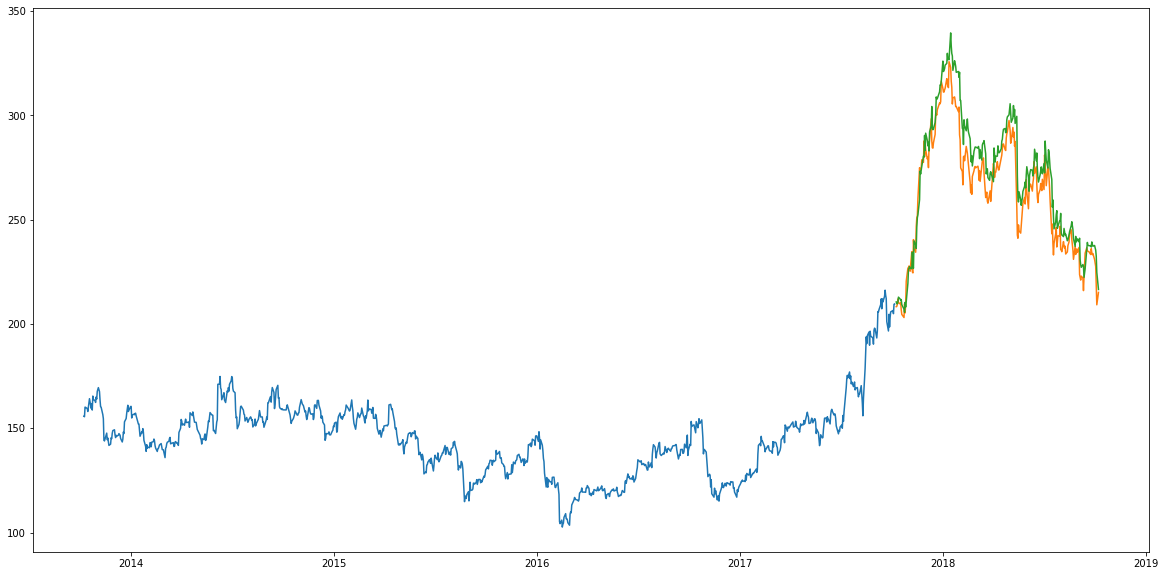

In [33]:
train_data=new_dataset[:987]
valid_data=new_dataset[987:]
valid_data['Predictions']=predicted_closing_price
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])